# Homework 2 Problem 2
Please finish the following code and copy the nessary result to the report for the discussion

### Part 0, data generation function
We would like to first import some necessary Libraries for this task and then write down the data generation function as follow. 

We also create the polynomial design matrix up to order k, which is given in polynomialfeatures function. 


In [349]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
%matplotlib inline

def ftrue(x):
    return np.sin(x)
def generatedata(ndata,seed):
    rng = np.random.RandomState(seed)
    Xtrain = np.linspace(0,1,ndata)
    Ytrain = np.sin(Xtrain*10.0) + 0.1 * rng.randn(ndata)
    return Xtrain,Ytrain
X,Y = generatedata(100,1)
x_train, y_train = generatedata(100,1)
x_test, y_test = generatedata(100,2)


def polynomialfeatures(x,k):
    if len(x.shape) == 1:
        x = x[:,np.newaxis] 
    index = range(1,k+1)
    X = np.concatenate([x**i for i in index],1)
    return X

# def polynomialfeatures(x,k):
#     X = np.zeros((len(x),k))
#     for i in range(1,len(x)+1):
#         for j in range(1,k+1):
#             X[i−1,j−1]=x[i−1]∗∗j
#     return X


### Part 1: Use BIC for tuning parameter selection
Please feel free to use the sklearn library [sklearn.linear_model.Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) to solve the Ridge regression in this section to find the tuning parameter selection. We don't need to do standarlization in this example since all $x^i\in [0,1]$ if $x \in [0,1]$, which are already in the same scale.

(a) Please compute and plot on how do the $RSS=\|y-\hat{y}\|^{2}$ and degree of freedom $df=trace(X(X^{T}X+\lambda I)^{-1}X^{T})$ change according to the tuning parameter $\lambda$. 




Text(0.5,1,'df V/S RSS values')

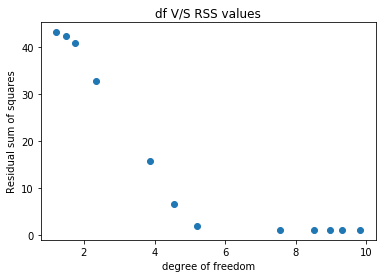

In [350]:
from sklearn.linear_model import Ridge
from sklearn import preprocessing
lambdaall = [1e-13, 1e-12,1e-11,1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

RSS = np.array(lambdaall)*0
df = np.array(lambdaall)*0
x_p = polynomialfeatures(x_train,10)
x_testp = polynomialfeatures(x_test,10)
for i,lambda1 in enumerate(lambdaall):
# Please complete this part, please use np.trace to compute the trace of a matrix
    clf = Ridge(alpha=lambda1)
    clf.fit(x_p, y_train)
    y_pred = clf.predict(x_testp)
    RSS_diff = y_test-y_pred
    norm = np.linalg.norm(RSS_diff)
    RSS[i]=norm**2 

    X_ =np.matmul(x_p.T,x_p)+np.dot(lambda1,np.identity(10))
    X_inverse = np.linalg.inv(X_)
    X1 = np.matmul(x_p,X_inverse)
    X2 = np.matmul(X1,x_p.T)
    df[i]=np.trace(X2)
    
plt.scatter(df,RSS)
plt.ylabel('Residual sum of squares')
plt.xlabel('degree of freedom')
plt.title('df V/S RSS values')
    
    
    
   

In [351]:
print("RSS VALUES:",RSS,'\n\n',"df values:",df)

RSS VALUES: [  1.12977886   1.12794779   1.12759635   1.11957906   1.08906155
   1.91171907   6.52120238  15.66908278  32.87925574  40.91348285
  42.37523496  43.16180982] 

 df values: [ 9.8224594   9.30924196  8.96048159  8.52024895  7.54431136  5.20387301
  4.56413472  3.86486735  2.3290028   1.75074531  1.48786667  1.21930632]


(b) Please plot the following BIC criterion function for each tuning parameter $\lambda$. $BIC=n\log(RSS)+df\cdot\log(n)$

For lambda : 1e-13 	BIC Values: 57.436288457
For lambda : 1e-12 	BIC Values: 54.9106303117
For lambda : 1e-11 	BIC Values: 53.2733667671
For lambda : 1e-10 	BIC Values: 50.5324735468
For lambda : 1e-08 	BIC Values: 43.2744737181
For lambda : 0.0001 	BIC Values: 88.7650080658
For lambda : 0.001 	BIC Values: 208.524494359
For lambda : 0.01 	BIC Values: 292.967324029
For lambda : 1 	BIC Values: 360.009647673
For lambda : 5 	BIC Values: 379.208446376
For lambda : 10 	BIC Values: 381.508290276
For lambda : 20 	BIC Values: 382.110720322


Text(0.5,1,'lambda V/S BIC')

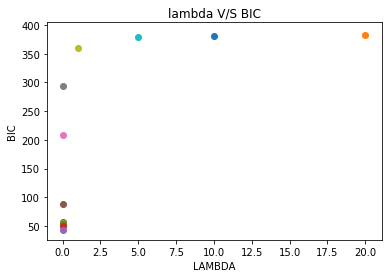

In [352]:
import math

for i in range(0,len(lambdaall)):
    BIC = len(x_p)*math.log(RSS[i]) + df[i]*math.log(len(x_p))
    print("For lambda :",lambdaall[i],'\t'  "BIC Values:",BIC)
    plt.scatter(lambdaall[i],BIC)

plt.ylabel('BIC')
plt.xlabel('LAMBDA')
plt.title('lambda V/S BIC')
    


### Part 3 Implement your own Cross-validation

Please use the K-fold function in sklearn as [sklearn.model_selection.KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to perform cross-validation. 

In [353]:
p = 30
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=50,shuffle=True)


allalpha=  [1e-13, 1e-12,1e-11,1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
nalpha = len(allalpha)
valscore = np.zeros((nalpha,50))
val_score = np.zeros(nalpha)
for i,alpha in enumerate(allalpha):
    for j,(train_index, val_index) in enumerate(kf.split(X)):
        X_train, X_val = x_p[train_index], x_testp[val_index]
        y_train, y_val = Y[train_index], Y[val_index]
        ridge = Ridge(alpha=alpha,normalize= True, random_state=77)
        y_train_  = y_train.reshape(-1,1)
        ridge.fit(X_train,y_train_)
        y_pred = ridge.predict(X_val)
        valscore[i] =np.mean(np.sum((y_val-y_pred)**2))          
    
for i,j in enumerate(valscore):
    val_score[i] = np.mean(j)

print("MSE values for the cross-validation:",val_score,'\t')
print(" For alpha value:",allalpha[np.argmin(val_score)],'\n',"Minimum MSE value is :",np.min(val_score))


MSE values for the cross-validation: [ 0.67148232  3.17214903  0.03452281  0.61348029  3.74572855  1.29612203
  1.05499216  2.39313374  1.82908878  0.23991309  2.87808478  3.60847237] 	
 For alpha value: 1e-11 
 Minimum MSE value is : 0.0345228059974
